# Data Understanding

## Pengumpulan Data

In [3]:
from google.colab import files
uploaded = files.upload()

import pandas as pd


data = pd.read_csv("cirrhosis.csv")


Saving cirrhosis.csv to cirrhosis (1).csv


## Tampilan Data

In [2]:
import pandas as pd
from IPython.display import display, HTML

data = pd.read_csv("cirrhosis.csv")

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

html_table = data.to_html(classes='table table-striped', border=0)
display(HTML(f"""
<div style="height: 500px; overflow-y: scroll; border:1px solid #ddd; padding:10px">
{html_table}
</div>
"""))


,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
5,6,2503,D,Placebo,24201,F,N,Y,N,N,0.8,248.0,3.98,50.0,944.0,93.00,63.0,NaN,11.0,3.0
6,7,1832,C,Placebo,20284,F,N,Y,N,N,1.0,322.0,4.09,52.0,824.0,60.45,213.0,204.0,9.7,3.0
7,8,2466,D,Placebo,19379,F,N,N,N,N,0.3,280.0,4.00,52.0,4651.2,28.38,189.0,373.0,11.0,3.0
8,9,2400,D,D-penicillamine,15526,F,N,N,Y,N,3.2,562.0,3.08,79.0,2276.0,144.15,88.0,251.0,11.0,2.0
9,10,51,D,Placebo,25772,F,Y,N,Y,Y,12.6,200.0,2.74,140.0,918.0,147.25,143.0,302.0,11.5,4.0


## Profiling Data

### Menampilkan Statistik Variabel Numerik

In [7]:
data = data.drop(columns=["ID"])


numerical_data = data.select_dtypes(include='number')

stats = pd.DataFrame({
    'mean': numerical_data.mean(),
    'median': numerical_data.median(),
    'count': numerical_data.count(),
    'std': numerical_data.std(),
    'min': numerical_data.min(),
    'max': numerical_data.max()
})

html_table = stats.to_html(classes='table table-bordered', border=0)
display(HTML(f"""
<div style="max-height: 400px; overflow-y: auto; border:1px solid #ccc; padding:10px">
{html_table}
</div>
"""))

,mean,median,count,std,min,max
N_Days,1917.782297,1730.00,418,1104.672992,41.00,4795.00
Age,18533.351675,18628.00,418,3815.845055,9598.00,28650.00
Bilirubin,3.220813,1.40,418,4.407506,0.30,28.00
Cholesterol,369.510563,309.50,284,231.944545,120.00,1775.00
Albumin,3.497440,3.53,418,0.424972,1.96,4.64
Copper,97.648387,73.00,310,85.613920,4.00,588.00
Alk_Phos,1982.655769,1259.00,312,2140.388824,289.00,13862.40
SGOT,122.556346,114.70,312,56.699525,26.35,457.25
Tryglicerides,124.702128,108.00,282,65.148639,33.00,598.00
Platelets,257.024570,251.00,407,98.325585,62.00,721.00


### Menampilkan Statistik Variabel Kategorikal


Statistik untuk variabel kategorikal: Status
Status
C     232
D     161
CL     25
Name: count, dtype: int64


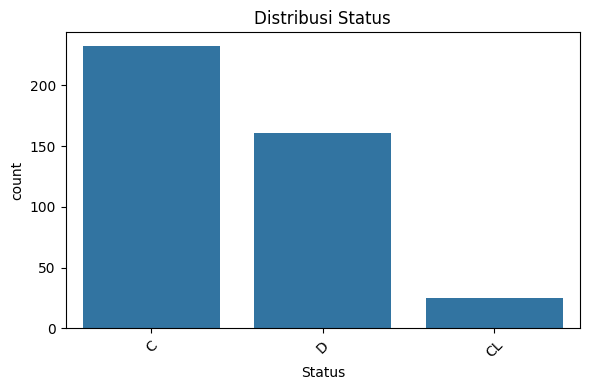


Statistik untuk variabel kategorikal: Drug
Drug
D-penicillamine    158
Placebo            154
Name: count, dtype: int64


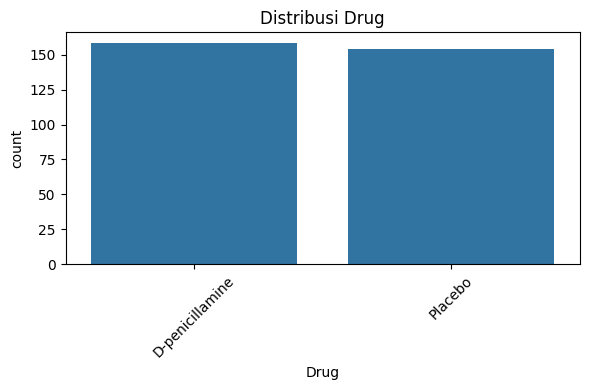


Statistik untuk variabel kategorikal: Sex
Sex
F    374
M     44
Name: count, dtype: int64


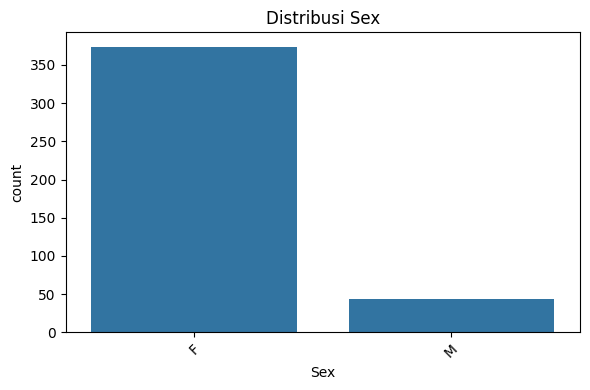


Statistik untuk variabel kategorikal: Ascites
Ascites
N    288
Y     24
Name: count, dtype: int64


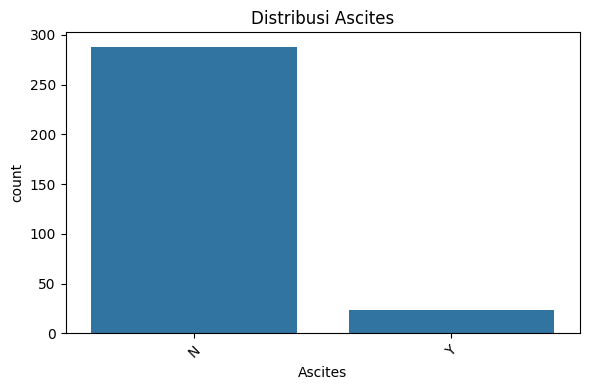


Statistik untuk variabel kategorikal: Hepatomegaly
Hepatomegaly
Y    160
N    152
Name: count, dtype: int64


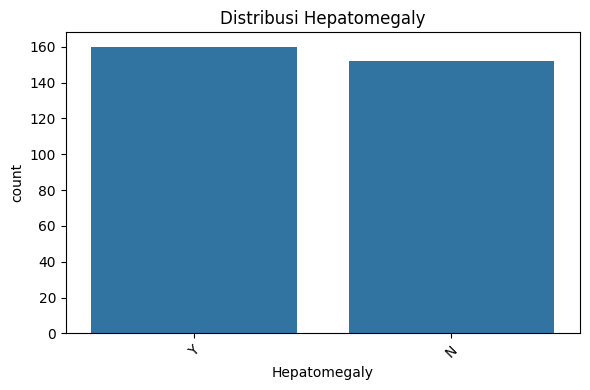


Statistik untuk variabel kategorikal: Spiders
Spiders
N    222
Y     90
Name: count, dtype: int64


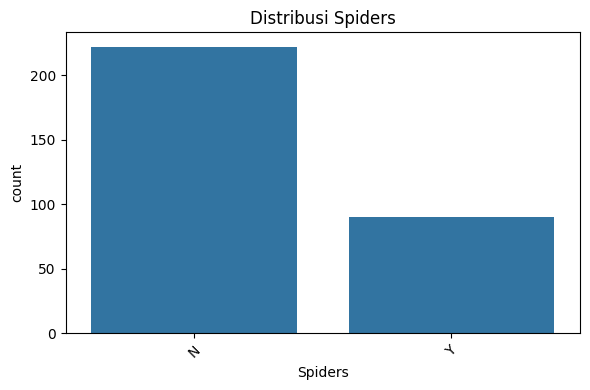


Statistik untuk variabel kategorikal: Edema
Edema
N    354
S     44
Y     20
Name: count, dtype: int64


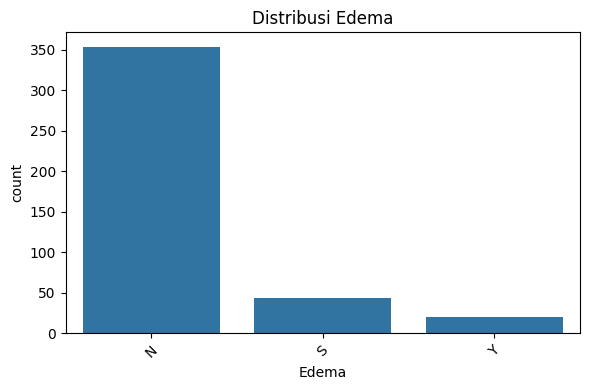

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Menentukan kolom kategorikal (bisa otomatis atau ditentukan manual)
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

# 3. Menampilkan statistik dan visualisasi untuk tiap kolom kategorikal
for col in categorical_cols:
    print(f"\nStatistik untuk variabel kategorikal: {col}")
    print(data[col].value_counts())

    plt.figure(figsize=(6,4))
    sns.countplot(data=data, x=col, order=data[col].value_counts().index)
    plt.title(f"Distribusi {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## Korelasi dan Asosiasi

Memahami Hubungan anatar variabel

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
N_Days,1.000000,-0.143223,-0.430252,-0.136734,0.401878,-0.361386,0.104443,-0.191062,-0.163853,0.159121,-0.128406,-0.363880
Age,-0.143223,1.000000,0.078177,-0.156638,-0.239676,0.082631,-0.019798,-0.120868,0.024710,-0.149650,0.244774,0.178980
Bilirubin,-0.430252,0.078177,1.000000,0.394966,-0.312043,0.460527,0.138787,0.424987,0.439691,-0.074395,0.331176,0.247861
Cholesterol,-0.136734,-0.156638,0.394966,1.000000,-0.067299,0.124413,0.152281,0.356971,0.273896,0.192548,-0.033374,0.004573
Albumin,0.401878,-0.239676,-0.312043,-0.067299,1.000000,-0.240408,-0.111497,-0.198210,-0.109673,0.198600,-0.199584,-0.310473
Copper,-0.361386,0.082631,0.460527,0.124413,-0.240408,1.000000,0.190912,0.301858,0.284579,-0.083976,0.213770,0.280346
Alk_Phos,0.104443,-0.019798,0.138787,0.152281,-0.111497,0.190912,1.000000,0.145242,0.182566,0.147250,0.087784,0.016821
SGOT,-0.191062,-0.120868,0.424987,0.356971,-0.198210,0.301858,0.145242,1.000000,0.134957,-0.058951,0.069940,0.142341
Tryglicerides,-0.163853,0.024710,0.439691,0.273896,-0.109673,0.284579,0.182566,0.134957,1.000000,0.101285,0.025087,0.126033
Platelets,0.159121,-0.149650,-0.074395,0.192548,0.198600,-0.083976,0.147250,-0.058951,0.101285,1.000000,-0.192859,-0.221546


,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
N_Days,1.000000,-0.143167,-0.498188,-0.086799,0.391038,-0.435934,-0.062621,-0.250369,-0.191581,0.162161,-0.136587,-0.371631
Age,-0.143167,1.000000,0.043054,-0.175859,-0.192793,0.026725,-0.102127,-0.154126,0.029932,-0.153490,0.196571,0.188752
Bilirubin,-0.498188,0.043054,1.000000,0.398157,-0.328866,0.637708,0.357369,0.572332,0.366501,-0.187762,0.269331,0.383038
Cholesterol,-0.086799,-0.175859,0.398157,1.000000,-0.021138,0.224916,0.445160,0.379767,0.375103,0.268129,-0.149641,-0.025713
Albumin,0.391038,-0.192793,-0.328866,-0.021138,1.000000,-0.263041,-0.192000,-0.202943,-0.086720,0.186906,-0.178819,-0.311786
Copper,-0.435934,0.026725,0.637708,0.224916,-0.263041,1.000000,0.281533,0.415695,0.331606,-0.103598,0.215475,0.307054
Alk_Phos,-0.062621,-0.102127,0.357369,0.445160,-0.192000,0.281533,1.000000,0.427559,0.240557,0.195184,0.086866,0.121719
SGOT,-0.250369,-0.154126,0.572332,0.379767,-0.202943,0.415695,0.427559,1.000000,0.150182,-0.021768,0.117796,0.172092
Tryglicerides,-0.191581,0.029932,0.366501,0.375103,-0.086720,0.331606,0.240557,0.150182,1.000000,0.071255,-0.085456,0.105503
Platelets,0.162161,-0.153490,-0.187762,0.268129,0.186906,-0.103598,0.195184,-0.021768,0.071255,1.000000,-0.227986,-0.236371


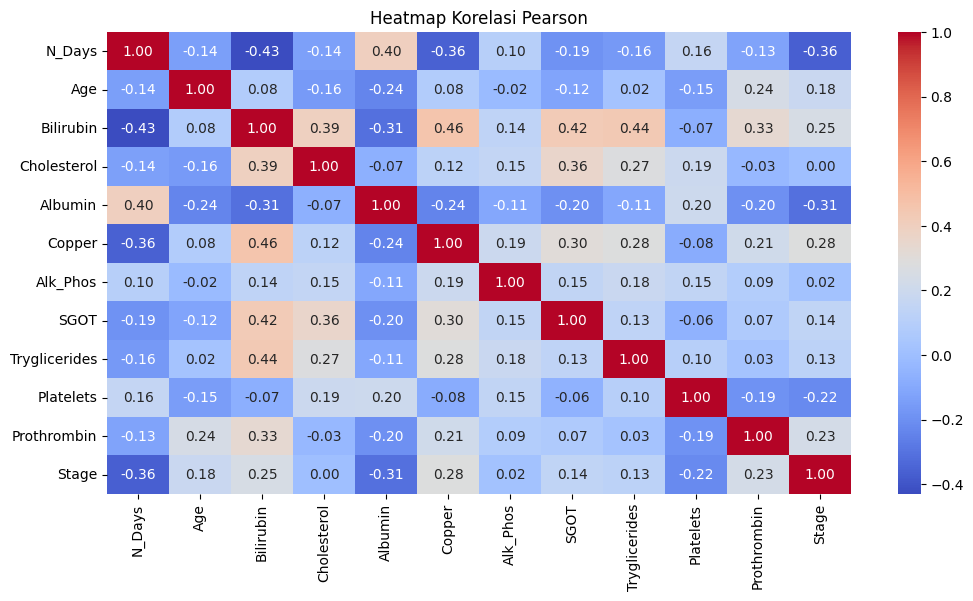

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML


numerical_data = data.select_dtypes(include='number').dropna()

pearson_corr = numerical_data.corr(method='pearson')
spearman_corr = numerical_data.corr(method='spearman')

def show_correlation_html(corr_matrix, title):
    html = corr_matrix.to_html(classes='table table-bordered', border=0)
    display(HTML(f"<h3>{title}</h3><div style='max-height: 400px; overflow-y: auto; border:1px solid #ccc; padding:10px'>{html}</div>"))

show_correlation_html(pearson_corr, "Korelasi Pearson")
show_correlation_html(spearman_corr, "Korelasi Spearman")

plt.figure(figsize=(12, 6))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Pearson")
plt.show()


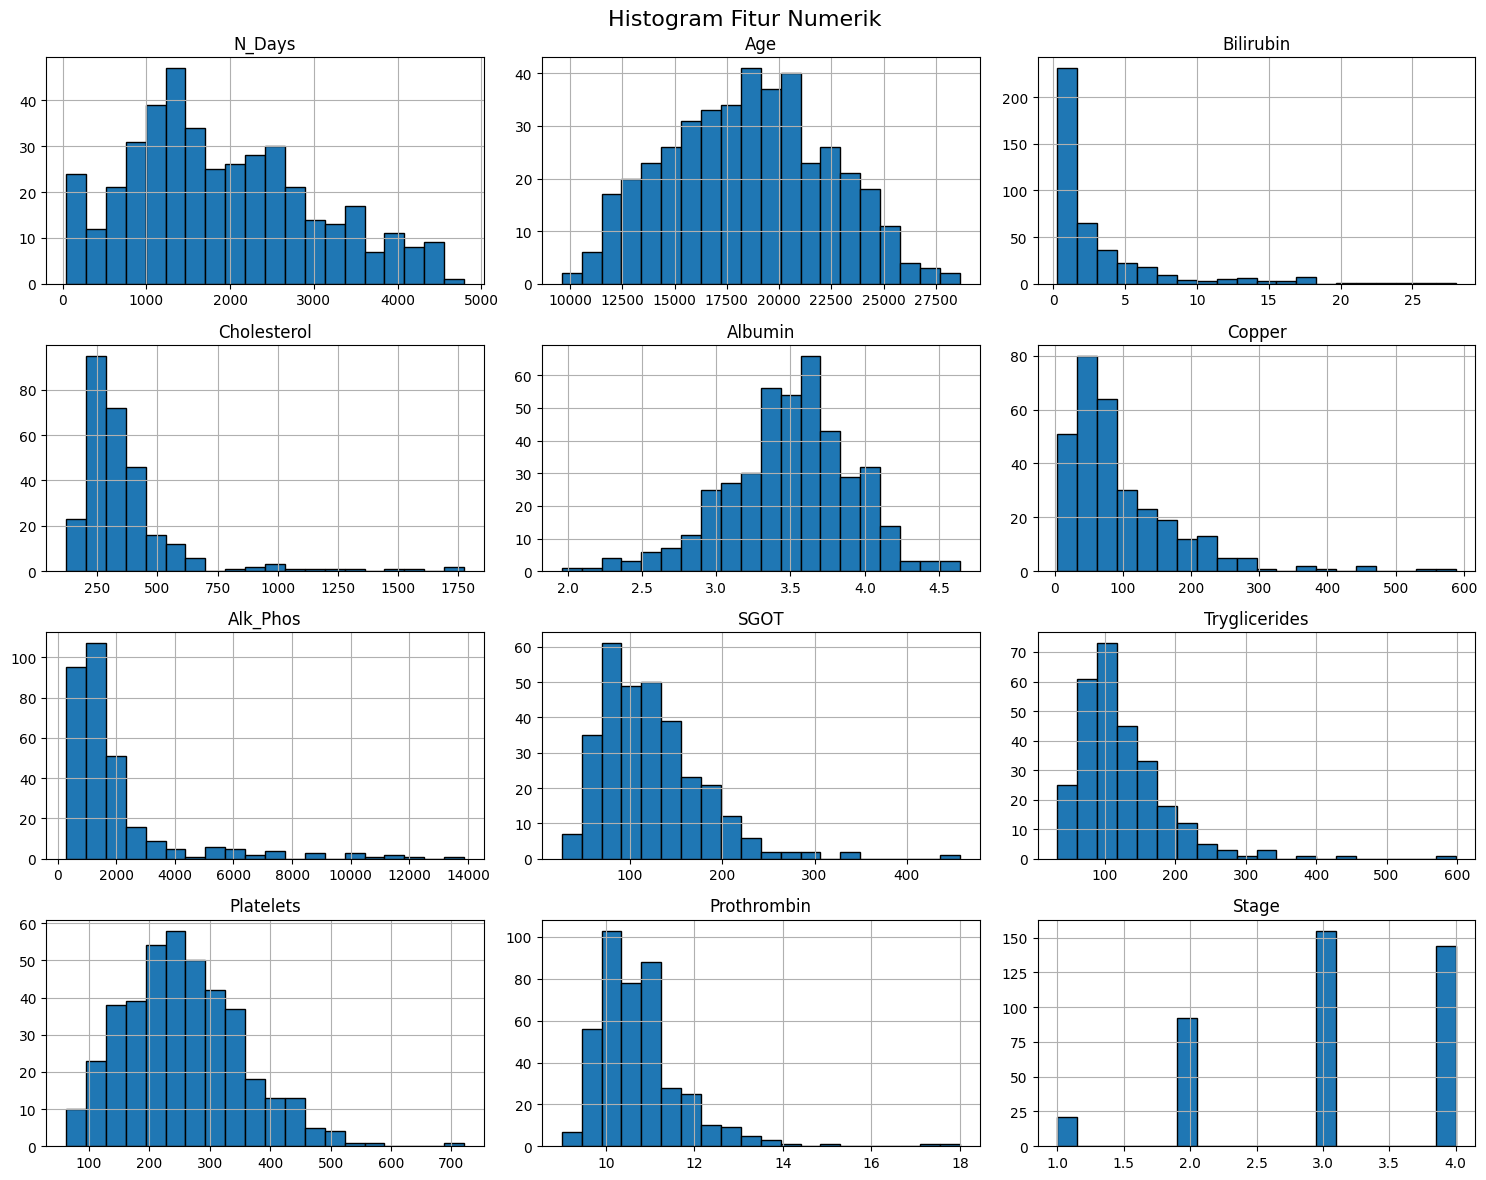

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data dan buang kolom ID
data = pd.read_csv("cirrhosis.csv")
data = data.drop(columns=["ID"])
numerical_data = data.select_dtypes(include='number')

# Histogram semua fitur numerik
numerical_data.hist(figsize=(15, 12), bins=20, edgecolor='black')
plt.suptitle("Histogram Fitur Numerik", fontsize=16)
plt.tight_layout()
plt.show()


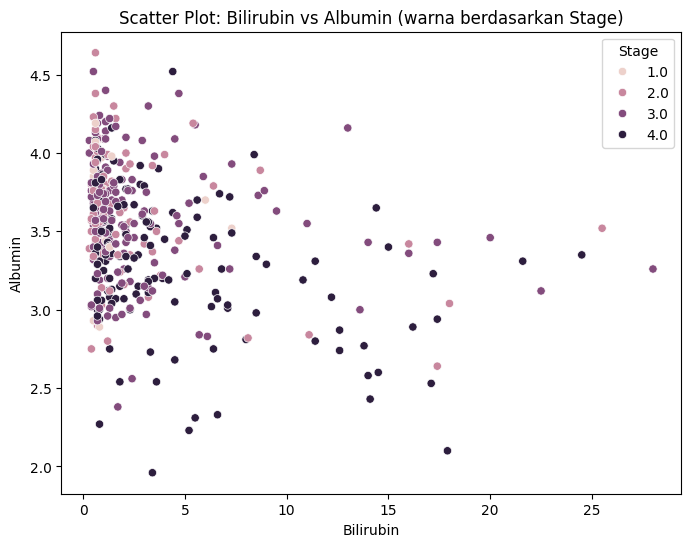

In [10]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Bilirubin', y='Albumin', hue='Stage')
plt.title("Scatter Plot: Bilirubin vs Albumin (warna berdasarkan Stage)")
plt.xlabel("Bilirubin")
plt.ylabel("Albumin")
plt.show()


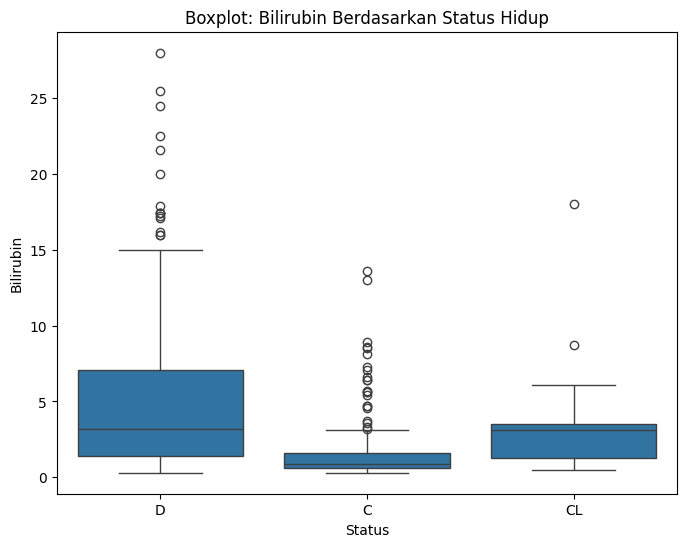

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Status', y='Bilirubin', data=data)
plt.title("Boxplot: Bilirubin Berdasarkan Status Hidup")
plt.xlabel("Status")
plt.ylabel("Bilirubin")
plt.show()


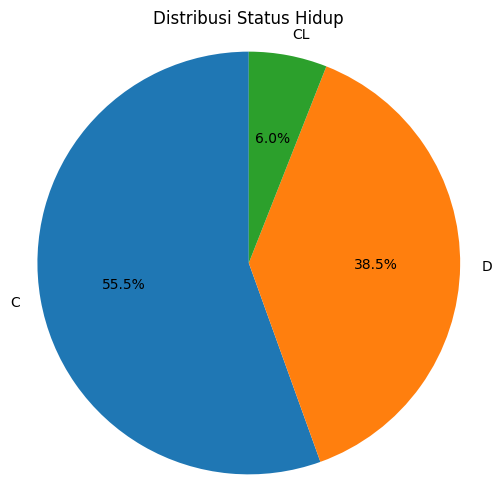

In [12]:
status_counts = data['Status'].value_counts()
labels = status_counts.index
sizes = status_counts.values

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Distribusi Status Hidup")
plt.axis('equal')  # Pie chart menjadi lingkaran
plt.show()


## Identifikasi Masalah

### Cek Misiing Value

In [21]:
print("Missing Values:")
print(data.isnull().sum())



Missing Values:
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64


### Cek Duplikasi

In [22]:
print("\nJumlah Duplikasi:")
print(data.duplicated().sum())


Jumlah Duplikasi:
0


### Cek Inkonsitensi

In [24]:
object_cols = data.select_dtypes(include=['object']).columns
for col in object_cols:
    print(f"\nNilai unik di kolom '{col}':")
    print(data[col].unique())



Nilai unik di kolom 'Status':
['D' 'C' 'CL']

Nilai unik di kolom 'Drug':
['D-penicillamine' 'Placebo' nan]

Nilai unik di kolom 'Sex':
['F' 'M']

Nilai unik di kolom 'Ascites':
['Y' 'N' nan]

Nilai unik di kolom 'Hepatomegaly':
['Y' 'N' nan]

Nilai unik di kolom 'Spiders':
['Y' 'N' nan]

Nilai unik di kolom 'Edema':
['Y' 'N' 'S']


### Deteksi Outlier

In [29]:
def indeks_outlier_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)].index

outlier_indices_per_feature = {}

for col in numeric_cols:
    outlier_idx = indeks_outlier_iqr(data[col].dropna())
    outlier_indices_per_feature[col] = outlier_idx.tolist()

for fitur, indices in outlier_indices_per_feature.items():
    print(f"\nFitur: {fitur}")
    print(f"Jumlah outlier: {len(indices)}")
    print(f"ID: {indices}")



Fitur: N_Days
Jumlah outlier: 0
ID: []

Fitur: Age
Jumlah outlier: 0
ID: []

Fitur: Bilirubin
Jumlah outlier: 46
ID: [0, 9, 17, 22, 26, 27, 62, 68, 73, 74, 75, 80, 94, 127, 129, 137, 143, 155, 163, 183, 186, 190, 192, 216, 222, 234, 242, 280, 287, 291, 292, 331, 337, 340, 342, 343, 350, 361, 367, 369, 370, 375, 381, 386, 397, 398]

Fitur: Cholesterol
Jumlah outlier: 20
ID: [25, 62, 68, 74, 85, 89, 116, 118, 129, 147, 165, 183, 186, 190, 192, 214, 234, 246, 293, 294]

Fitur: Albumin
Jumlah outlier: 9
ID: [13, 69, 222, 230, 266, 280, 299, 360, 385]

Fitur: Copper
Jumlah outlier: 17
ID: [17, 21, 22, 47, 53, 73, 79, 119, 137, 147, 148, 183, 186, 192, 232, 240, 252]

Fitur: Alk_Phos
Jumlah outlier: 35
ID: [1, 3, 7, 14, 22, 23, 26, 28, 29, 30, 31, 34, 36, 38, 39, 41, 42, 45, 47, 50, 51, 52, 53, 54, 55, 56, 57, 58, 62, 143, 147, 190, 205, 246, 304]

Fitur: SGOT
Jumlah outlier: 7
ID: [17, 66, 127, 165, 243, 280, 304]

Fitur: Tryglicerides
Jumlah outlier: 10
ID: [55, 73, 74, 80, 81, 115, 147, 

# Preprocessing

### Data Outlier dan Tidak

In [37]:
from IPython.display import display, HTML

# Salin data
data_outlier = data.copy()
data_outlier['id'] = data_outlier.index + 1

# Loop per fitur numerik
for col in numeric_cols:
    # Hitung batas IQR
    Q1 = data_outlier[col].quantile(0.25)
    Q3 = data_outlier[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Buat kolom outlier
    outlier_col = f'outlier_{col}'
    data_outlier[outlier_col] = data_outlier[col].apply(
        lambda x: -1 if pd.notnull(x) and (x < lower or x > upper) else 1
    )

    # Buat tabel untuk fitur ini
    sub_table = data_outlier[['id', col, outlier_col]]

    # Tampilkan
    display(HTML(f"<h4>Outlier untuk Fitur: {col}</h4>"))
    display(sub_table)


,id,N_Days,outlier_N_Days
0,1,400,1
1,2,4500,1
2,3,1012,1
3,4,1925,1
4,5,1504,1
5,6,2503,1
6,7,1832,1
7,8,2466,1
8,9,2400,1
9,10,51,1


,id,Age,outlier_Age
0,1,21464,1
1,2,20617,1
2,3,25594,1
3,4,19994,1
4,5,13918,1
5,6,24201,1
6,7,20284,1
7,8,19379,1
8,9,15526,1
9,10,25772,1


,id,Bilirubin,outlier_Bilirubin
0,1,14.5,-1
1,2,1.1,1
2,3,1.4,1
3,4,1.8,1
4,5,3.4,1
5,6,0.8,1
6,7,1.0,1
7,8,0.3,1
8,9,3.2,1
9,10,12.6,-1


,id,Cholesterol,outlier_Cholesterol
0,1,261.0,1
1,2,302.0,1
2,3,176.0,1
3,4,244.0,1
4,5,279.0,1
5,6,248.0,1
6,7,322.0,1
7,8,280.0,1
8,9,562.0,1
9,10,200.0,1


,id,Albumin,outlier_Albumin
0,1,2.60,1
1,2,4.14,1
2,3,3.48,1
3,4,2.54,1
4,5,3.53,1
5,6,3.98,1
6,7,4.09,1
7,8,4.00,1
8,9,3.08,1
9,10,2.74,1


,id,Copper,outlier_Copper
0,1,156.0,1
1,2,54.0,1
2,3,210.0,1
3,4,64.0,1
4,5,143.0,1
5,6,50.0,1
6,7,52.0,1
7,8,52.0,1
8,9,79.0,1
9,10,140.0,1


,id,Alk_Phos,outlier_Alk_Phos
0,1,1718.0,1
1,2,7394.8,-1
2,3,516.0,1
3,4,6121.8,-1
4,5,671.0,1
5,6,944.0,1
6,7,824.0,1
7,8,4651.2,-1
8,9,2276.0,1
9,10,918.0,1


,id,SGOT,outlier_SGOT
0,1,137.95,1
1,2,113.52,1
2,3,96.10,1
3,4,60.63,1
4,5,113.15,1
5,6,93.00,1
6,7,60.45,1
7,8,28.38,1
8,9,144.15,1
9,10,147.25,1


,id,Tryglicerides,outlier_Tryglicerides
0,1,172.0,1
1,2,88.0,1
2,3,55.0,1
3,4,92.0,1
4,5,72.0,1
5,6,63.0,1
6,7,213.0,1
7,8,189.0,1
8,9,88.0,1
9,10,143.0,1


,id,Platelets,outlier_Platelets
0,1,190.0,1
1,2,221.0,1
2,3,151.0,1
3,4,183.0,1
4,5,136.0,1
5,6,NaN,1
6,7,204.0,1
7,8,373.0,1
8,9,251.0,1
9,10,302.0,1


,id,Prothrombin,outlier_Prothrombin
0,1,12.2,1
1,2,10.6,1
2,3,12.0,1
3,4,10.3,1
4,5,10.9,1
5,6,11.0,1
6,7,9.7,1
7,8,11.0,1
8,9,11.0,1
9,10,11.5,1


,id,Stage,outlier_Stage
0,1,4.0,1
1,2,3.0,1
2,3,4.0,1
3,4,4.0,1
4,5,3.0,1
5,6,3.0,1
6,7,3.0,1
7,8,3.0,1
8,9,2.0,1
9,10,4.0,1


### Data Outlier

In [38]:
from IPython.display import display, HTML

# Salin data
data_outlier = data.copy()
data_outlier['id'] = data_outlier.index + 1

# Loop per fitur numerik
for col in numeric_cols:
    # Hitung batas IQR
    Q1 = data_outlier[col].quantile(0.25)
    Q3 = data_outlier[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Buat kolom outlier
    outlier_col = f'outlier_{col}'
    data_outlier[outlier_col] = data_outlier[col].apply(
        lambda x: -1 if pd.notnull(x) and (x < lower or x > upper) else 1
    )

    # Filter hanya baris yang outlier (-1)
    sub_table = data_outlier[data_outlier[outlier_col] == -1][['id', col, outlier_col]]

    # Tampilkan hanya jika ada outlier
    if not sub_table.empty:
        display(HTML(f"<h4>Outlier untuk Fitur: {col}</h4>"))
        display(sub_table)


,id,Bilirubin,outlier_Bilirubin
0,1,14.5,-1
9,10,12.6,-1
17,18,11.4,-1
22,23,17.4,-1
26,27,21.6,-1
27,28,17.2,-1
62,63,22.5,-1
68,69,20.0,-1
73,74,8.4,-1
74,75,17.1,-1


,id,Cholesterol,outlier_Cholesterol
25,26,1128.0,-1
62,63,932.0,-1
68,69,652.0,-1
74,75,674.0,-1
85,86,1600.0,-1
89,90,660.0,-1
116,117,950.0,-1
118,119,636.0,-1
129,130,1775.0,-1
147,148,1015.0,-1


,id,Albumin,outlier_Albumin
13,14,2.27,-1
69,70,4.64,-1
222,223,2.43,-1
230,231,1.96,-1
266,267,2.33,-1
280,281,2.10,-1
299,300,2.23,-1
360,361,2.31,-1
385,386,2.38,-1


,id,Copper,outlier_Copper
17,18,588.0,-1
21,22,464.0,-1
22,23,558.0,-1
47,48,281.0,-1
53,54,262.0,-1
73,74,280.0,-1
79,80,269.0,-1
119,120,444.0,-1
137,138,262.0,-1
147,148,247.0,-1


,id,Alk_Phos,outlier_Alk_Phos
1,2,7394.8,-1
3,4,6121.8,-1
7,8,4651.2,-1
14,15,9009.8,-1
22,23,6064.8,-1
23,24,5719.0,-1
26,27,3697.4,-1
28,29,5833.0,-1
29,30,7277.0,-1
30,31,9933.2,-1


,id,SGOT,outlier_SGOT
17,18,280.55,-1
66,67,328.60,-1
127,128,299.15,-1
165,166,457.25,-1
243,244,272.80,-1
280,281,338.00,-1
304,305,288.00,-1


,id,Tryglicerides,outlier_Tryglicerides
55,56,319.0,-1
73,74,309.0,-1
74,75,598.0,-1
80,81,318.0,-1
81,82,272.0,-1
115,116,382.0,-1
147,148,280.0,-1
190,191,432.0,-1
240,241,322.0,-1
265,266,260.0,-1


,id,Platelets,outlier_Platelets
38,39,563.0,-1
45,46,518.0,-1
181,182,539.0,-1
201,202,514.0,-1
333,334,721.0,-1
360,361,517.0,-1


,id,Prothrombin,outlier_Prothrombin
11,12,13.6,-1
19,20,13.0,-1
27,28,13.0,-1
60,61,13.0,-1
61,62,13.2,-1
82,83,12.9,-1
106,107,17.1,-1
120,121,13.2,-1
122,123,13.0,-1
130,131,13.2,-1


### Data yang outlier sudah dihapus

In [39]:
# Salin data
data_no_outlier = data.copy()
data_no_outlier['id'] = data_no_outlier.index + 1

# Loop dan hapus outlier per fitur numerik
for col in numeric_cols:
    Q1 = data_no_outlier[col].quantile(0.25)
    Q3 = data_no_outlier[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Filter hanya yang bukan outlier
    data_no_outlier = data_no_outlier[
        (data_no_outlier[col].isnull()) |  # biarkan NaN
        ((data_no_outlier[col] >= lower) & (data_no_outlier[col] <= upper))
    ]

# Tampilkan data hasil tanpa outlier
from IPython.display import display
display(data_no_outlier)


,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,outlier,id
4,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0,1,5
5,2503,D,Placebo,24201,F,N,Y,N,N,0.8,248.0,3.98,50.0,944.0,93.00,63.0,NaN,11.0,3.0,1,6
8,2400,D,D-penicillamine,15526,F,N,N,Y,N,3.2,562.0,3.08,79.0,2276.0,144.15,88.0,251.0,11.0,2.0,1,9
10,3762,D,Placebo,19619,F,N,Y,Y,N,1.4,259.0,4.16,46.0,1104.0,79.05,79.0,258.0,12.0,4.0,1,11
12,3577,C,Placebo,16688,F,N,N,N,N,0.7,281.0,3.85,40.0,1181.0,88.35,130.0,244.0,10.6,3.0,1,13
15,3672,C,Placebo,14772,F,N,N,N,N,0.7,204.0,3.66,28.0,685.0,72.85,58.0,198.0,10.8,3.0,1,16
16,769,D,Placebo,19060,F,N,Y,N,N,2.7,274.0,3.15,159.0,1533.0,117.80,128.0,224.0,10.5,4.0,1,17
18,4232,C,D-penicillamine,18102,F,N,Y,N,S,0.7,235.0,3.56,39.0,1881.0,93.00,123.0,209.0,11.0,3.0,1,19
20,3445,C,Placebo,23445,M,N,Y,Y,N,0.6,252.0,3.83,41.0,843.0,65.10,83.0,336.0,11.4,4.0,1,21
24,4127,C,Placebo,16463,F,N,N,N,N,0.7,298.0,4.10,40.0,661.0,106.95,66.0,324.0,11.3,2.0,1,25


### Visualisasi Data dengan Outlier dan Tanpa Outlier

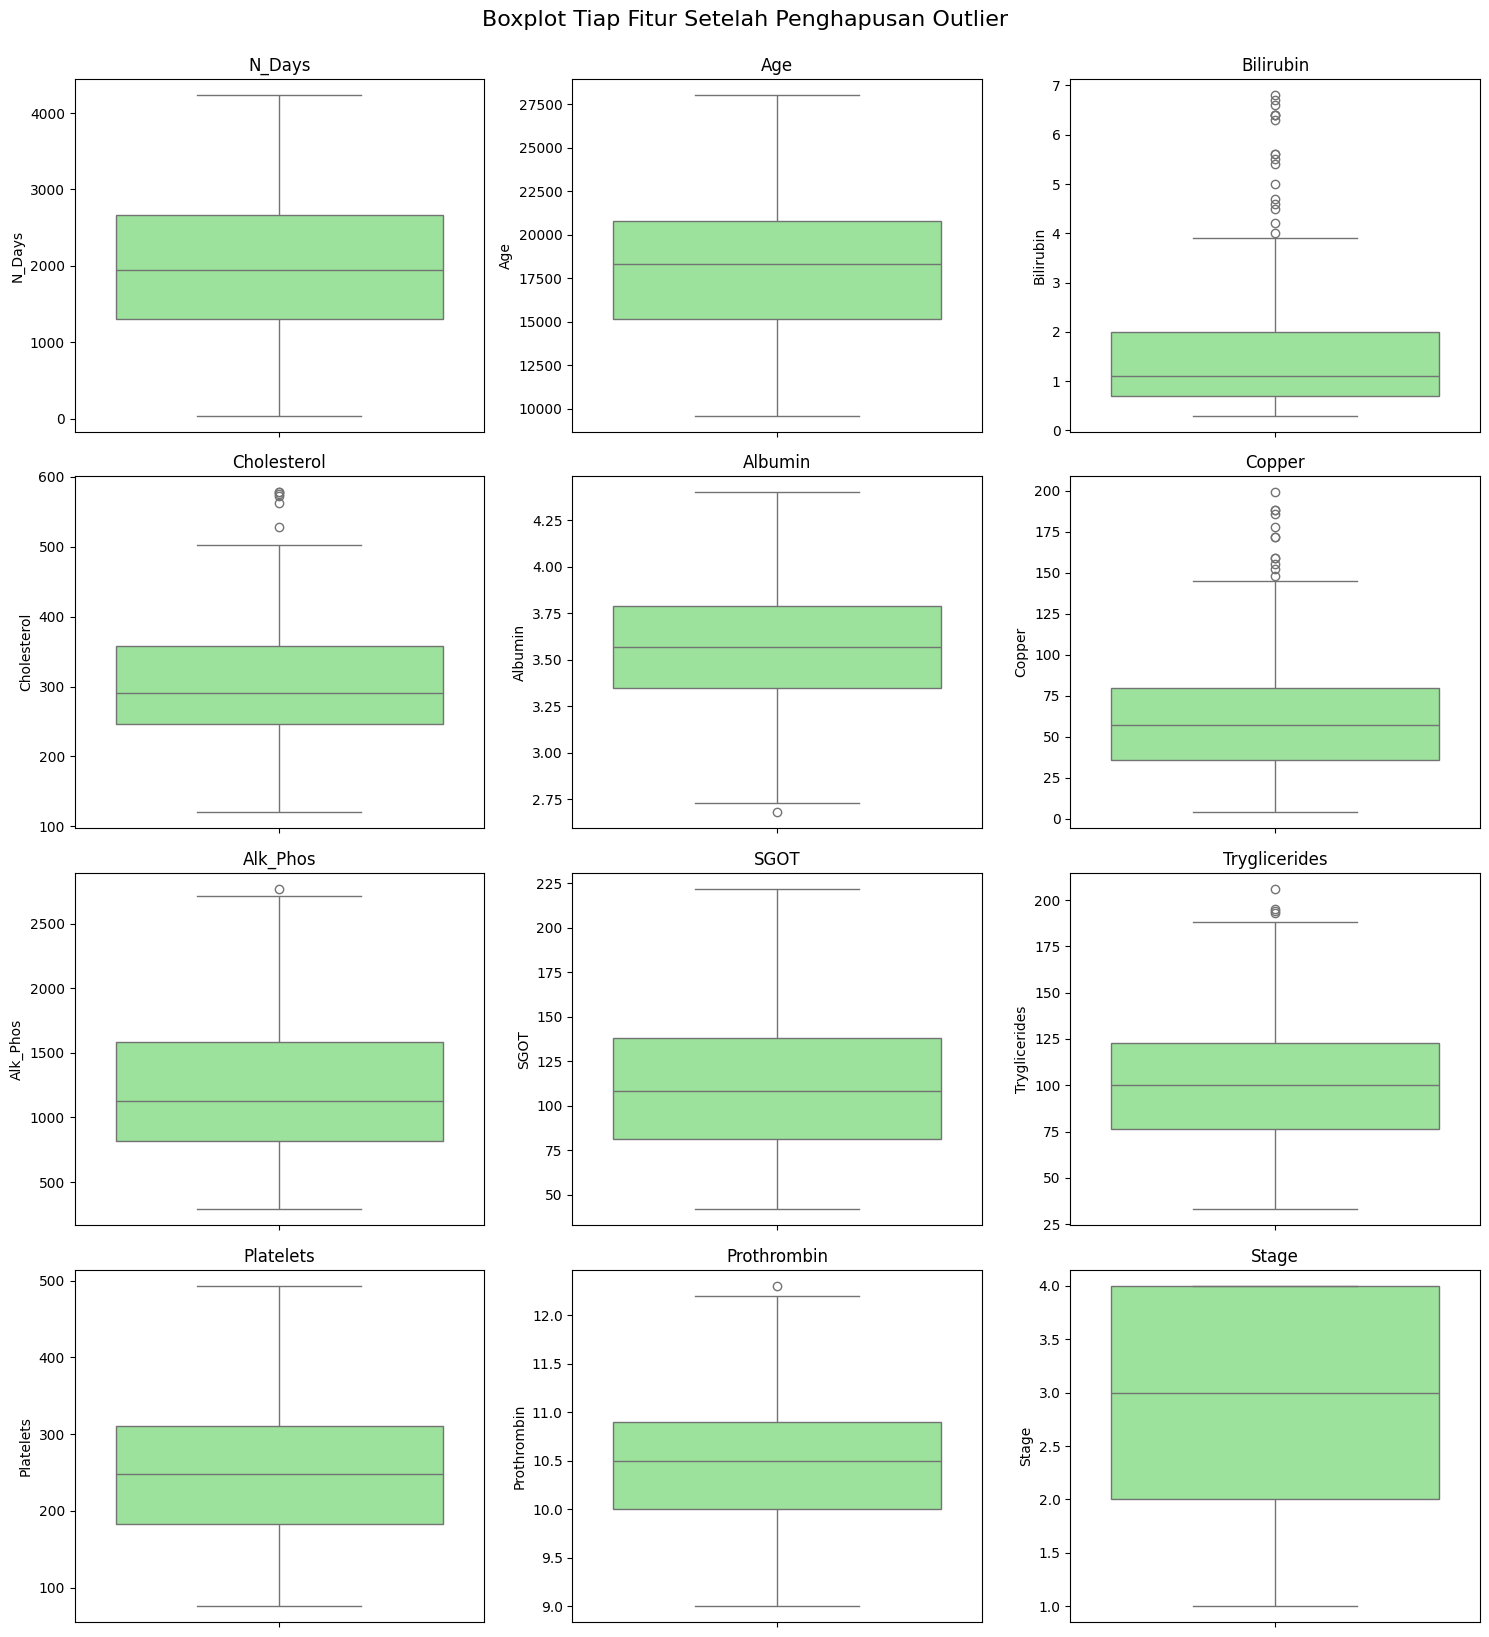

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Jumlah fitur dan konfigurasi subplot
num_features = len(numeric_cols)
n_cols = 3
n_rows = (num_features + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 5, n_rows * 4))

# Loop setiap fitur
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=data_no_outlier[col], color='lightgreen')
    plt.title(f"{col}")
    plt.tight_layout()

plt.suptitle("Boxplot Tiap Fitur Setelah Penghapusan Outlier", fontsize=16, y=1.02)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_features = len(numeric_cols)
n_cols = 3
n_rows = (num_features + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=data_no_outlier[col], color='lightgreen')
    plt.title(f"{col}")
    plt.tight_layout()

plt.suptitle("Boxplot Tiap Fitur Setelah Penghapusan Outlier", fontsize=16, y=1.02)
plt.show()


# Pemodelan

### Bagi data untuk training set sebesar 80% dan data untuk testing 20%

In [44]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split

# Load dataset
data = pd.read_csv("cirrhosis.csv")

# Pilih kolom numerik dan hapus baris dengan NaN
numeric_cols = data.select_dtypes(include='number').columns.tolist()
data_clean = data[numeric_cols].dropna()

# Terapkan LOF untuk mendeteksi outlier
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)  # 10% sebagai outlier
outlier_flags = lof.fit_predict(data_clean)

# Simpan hanya data yang bukan outlier
data_no_outlier = data.loc[data_clean.index[outlier_flags == 1]].copy()
data_no_outlier['id'] = data_no_outlier.index + 1

# Split ke training dan testing set
train_data, test_data = train_test_split(data_no_outlier, test_size=0.2, random_state=42)

# Simpan ke file CSV jika diperlukan
train_data.to_csv("train_data_lof.csv", index=False)
test_data.to_csv("test_data_lof.csv", index=False)


## AKurasi Denan Outlier dan Tanpat Outlier

In [45]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = pd.read_csv("cirrhosis.csv")

# Tentukan kolom target
target_col = 'Status'

# Hapus baris dengan target null
data = data.dropna(subset=[target_col])

# Encode target menjadi angka
data[target_col] = data[target_col].astype('category').cat.codes

# Encode semua fitur kategorikal jadi numerik
data_encoded = pd.get_dummies(data, drop_first=True)

# Hapus baris dengan NaN (untuk memudahkan pemrosesan)
data_clean = data_encoded.dropna()

# -----------------------------
# 1. Data TANPA Outlier (LOF)
# -----------------------------
# Gunakan LOF untuk mendeteksi outlier
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
outlier_flags = lof.fit_predict(data_clean)

# Simpan hanya data non-outlier
data_no_outlier = data_clean[outlier_flags == 1]

# Bagi fitur dan target
X_no_out = data_no_outlier.drop(columns=[target_col])
y_no_out = data_no_outlier[target_col]
X_train_no_out, X_test_no_out, y_train_no_out, y_test_no_out = train_test_split(
    X_no_out, y_no_out, test_size=0.2, random_state=42
)

# Latih model
model_no_out = RandomForestClassifier(random_state=42)
model_no_out.fit(X_train_no_out, y_train_no_out)
y_pred_no_out = model_no_out.predict(X_test_no_out)

# -----------------------------
# 2. Data DENGAN Outlier
# -----------------------------
X_full = data_clean.drop(columns=[target_col])
y_full = data_clean[target_col]
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X_full, y_full, test_size=0.2, random_state=42
)

# Latih model
model_full = RandomForestClassifier(random_state=42)
model_full.fit(X_train_full, y_train_full)
y_pred_full = model_full.predict(X_test_full)

# -----------------------------
# Evaluasi Akurasi
# -----------------------------
accuracy_no_out = accuracy_score(y_test_no_out, y_pred_no_out)
accuracy_full = accuracy_score(y_test_full, y_pred_full)

print("Akurasi TANPA outlier:", accuracy_no_out)
print("Akurasi DENGAN outlier:", accuracy_full)


Akurasi TANPA outlier: 0.82
Akurasi DENGAN outlier: 0.8214285714285714


# Evaluasi

Dengan Menggunakan LOF hasil akurasi mencaoai 82%